In [1]:
import tensorflow as tf
import numpy as np
import pandas
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer# en este ejemplo se usa tf-idf
from sklearn.linear_model import LogisticRegression

from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from sklearn.preprocessing import OneHotEncoder
from keras.utils import plot_model


Using TensorFlow backend.


In [2]:
articles = []
labels = []

DataSet=pandas.read_csv("c:\\AttributionDL\\AttributionDataset.csv", delimiter = ',')
DataSet=DataSet.sample(frac = 1).reset_index(drop=True)#to shuffle your dataframe in-place and reset the index

for i in range(len(DataSet)) : 
    articles.append(DataSet.loc[i, "Texto"])
    labels.append(DataSet.loc[i, "Autor"])

In [3]:
#creando conjuntos de entrenamiento y prueba
train_articles,test_articles,train_labels,test_labels = train_test_split(articles,labels, test_size = 0.20, random_state = 42)

In [4]:
#vectorizer = CountVectorizer()#conteo de frecuencia
vectorizer = CountVectorizer(analyzer='word', ngram_range=(2, 2))#bigramas de palabras
vectorizer.fit(train_articles)
X_train = vectorizer.transform(train_articles)
X_test = vectorizer.transform(test_articles)
transformer = TfidfTransformer()
tfidf_xtrain = transformer.fit_transform(X_train)
tfidf_xtest = transformer.fit_transform(X_test)

In [5]:
tfidf_xtrain

<768x520005 sparse matrix of type '<class 'numpy.float64'>'
	with 1288721 stored elements in Compressed Sparse Row format>

In [6]:
tfidf_xtest

<192x520005 sparse matrix of type '<class 'numpy.float64'>'
	with 222066 stored elements in Compressed Sparse Row format>

In [7]:
train_labels = pandas.get_dummies(train_labels)
test_labels = pandas.get_dummies(test_labels) 
#una pagina indica que to_categorical solo enteros como entrada
#y que get_dummies() de pandas acepta cadenas
print(X_train.shape,X_test.shape)

(768, 520005) (192, 520005)


In [8]:
#X_train= np.asarray(X_train)
#X_test= np.asarray(X_test)
train_labels = np.asarray(train_labels)#convertí para pasarlode dataframe a numpyarray
test_labels = np.asarray(test_labels)  #así evite el error de inconsistencia de tipo en fit()

In [9]:
input_dim = X_train.shape[1]  # Number of features

#pendiente para graficarla
model = Sequential()
model.add(layers.Dense(10, input_dim=input_dim, activation='relu'))
model.add(layers.Dense(7, activation='sigmoid')) #7 indicaría el numero de etiquetas
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                5200060   
_________________________________________________________________
dense_1 (Dense)              (None, 7)                 77        
Total params: 5,200,137
Trainable params: 5,200,137
Non-trainable params: 0
_________________________________________________________________


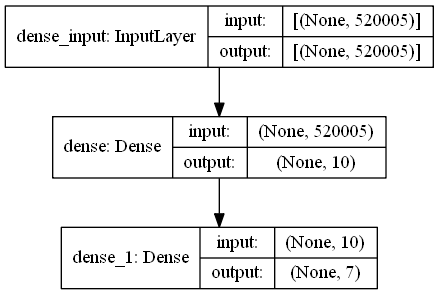

In [10]:
#graficando el modelo
tf.keras.utils.plot_model(model, to_file='model_plot4a.png', show_shapes=True, show_layer_names=True)

In [11]:
#compilando la red
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [12]:
#evaluando distintas formas de uso para fit
history = model.fit(X_train, train_labels, epochs=20,validation_data=(X_test,test_labels),batch_size=10)

accr = model.evaluate(X_test,test_labels)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

Epoch 1/20
77/77 [==============================] - 3s 37ms/step - loss: 1.7671 - accuracy: 0.2346 - val_loss: 1.3055 - val_accuracy: 0.2760
Epoch 2/20
77/77 [==============================] - 3s 33ms/step - loss: 1.2696 - accuracy: 0.3502 - val_loss: 1.3138 - val_accuracy: 0.6094
Epoch 3/20
77/77 [==============================] - 2s 32ms/step - loss: 1.0659 - accuracy: 0.6416 - val_loss: 1.3022 - val_accuracy: 0.4375
Epoch 4/20
77/77 [==============================] - 3s 33ms/step - loss: 0.8334 - accuracy: 0.7200 - val_loss: 0.9710 - val_accuracy: 0.6302
Epoch 5/20
77/77 [==============================] - 2s 32ms/step - loss: 0.4501 - accuracy: 0.8775 - val_loss: 0.8652 - val_accuracy: 0.6823
Epoch 6/20
77/77 [==============================] - 3s 33ms/step - loss: 0.2606 - accuracy: 0.9246 - val_loss: 1.2225 - val_accuracy: 0.5938
Epoch 7/20
77/77 [==============================] - 3s 33ms/step - loss: 0.3455 - accuracy: 0.9657 - val_loss: 1.3614 - val_accuracy: 0.5000
Epoch 8/20
77

In [13]:
train_labels = pandas.get_dummies(train_labels)
test_labels = pandas.get_dummies(test_labels) 
#una pagina indica que to_categorical solo enteros como entrada
#y que get_dummies() de pandas acepta cadenas
print(X_train.shape,X_test.shape)

Exception: Data must be 1-dimensional

In [ ]:
#X_train= np.asarray(X_train)
#X_test= np.asarray(X_test)
train_labels = np.asarray(train_labels)#convertí para pasarlode dataframe a numpyarray
test_labels = np.asarray(test_labels)  #así evite el error de inconsistencia de tipo en fit()

In [ ]:
input_dim = X_train.shape[1]  # Number of features

#pendiente para graficarla
model = Sequential()
model.add(layers.Dense(10, input_dim=input_dim, activation='relu'))
model.add(layers.Dense(7, activation='sigmoid')) #7 indicaría el numero de etiquetas
model.summary()

In [ ]:
#graficando el modelo
tf.keras.utils.plot_model(model, to_file='model_plot4a.png', show_shapes=True, show_layer_names=True)

In [ ]:
#compilando la red
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
#evaluando distintas formas de uso para fit
history = model.fit(X_train, train_labels, epochs=20,validation_data=(X_test,test_labels),batch_size=10)

accr = model.evaluate(X_test,test_labels)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))